# Linear Regression 线性回归
#用于预测定量（数字）响应
Used to predict quantitative (numerical) response.
+ Can we determine if a relationship exists between predictors and response?
+ How strong is this relationship?
+ Which predictors are related to response?
+ How accurate are predictions once model is fit?
+ Is a linear model appropriate?
+ Are there interaction effects?
+ 我们能否确定预测因子和响应之间是否存在关系？
+ 这种关系有多强？
+ 哪些预测因子与响应相关？
+ 模型拟合后预测的准确性如何？
+ 线性模型合适吗？
+ 是否存在交互效应？

## Simple Linear Regression (SLR) 简单线性回归
Technically this means one predictor is linearly related to the response.
从技术上讲，这意味着一个预测变量与响应呈线性相关。
	$$ Y = \beta_0 +  \beta_1 X + \epsilon$$

There are two unknown constants that we need to estimate, the intercept $\beta_0$ and the slope, $\beta_1$. Also called coefficients or parameters.

我们需要估计两个未知常数，即截距 $\beta_0$ 和斜率 $\beta_1$。也称为系数或参数。

Once they are estimated, the estimated fit becomes 一旦估算出来，估计拟合度就变成
	$$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

There are various ways of estimating the coefficients. The most common approach is via the least squares technique.估算系数的方法有很多种，最常用的方法是采用最小二乘法。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
adv = pd.read_csv('/content/Advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


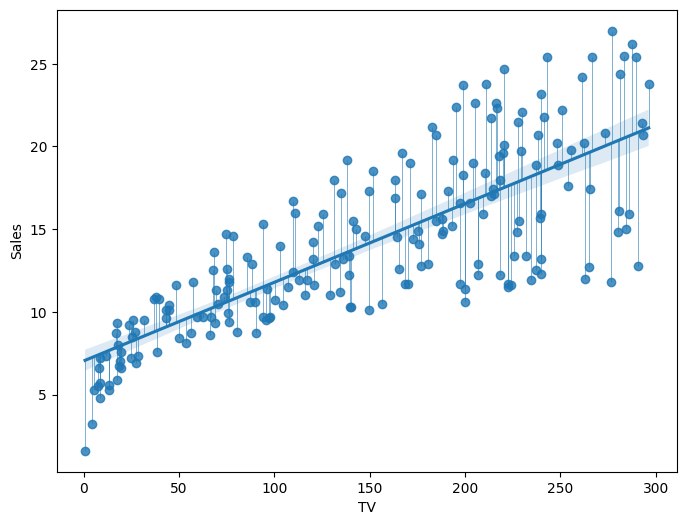

In [ ]:
fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)#得到了拟合系数
y_hat = fit[1] + adv['TV'] * fit[0]#根据拟合系数计算了拟合直线上的预测值

plt.figure(figsize=(8, 6))#设置图形大小为 8x6 英寸
sns.regplot(x='TV', y='Sales', data=adv)#绘制了散点图和拟合直线
#绘制了从每个数据点到拟合直线的垂直线段，这些线段的长度表示了数据点到拟合直线的误差
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4);

In [ ]:
np.polyfit?

In [ ]:
fit

array([0.04753664, 7.03259355])

### Assessing the Accuracy of the Coefficient Estimates评估系数估计的准确性
The theoretical best linear relationship can be defined as 理论上最佳线性关系可以定义为:
	$$Y = \beta_0 + \beta_1 X + \epsilon$$

This **population regression line** will never be known in practice and remain unobserved unless it came from simulated data.

除非来自模拟数据，否则这种**总体回归线**在实践中永远不会为人所知，也不会被观察到。

**Unbiased** - An estimator that doesn't systematically over or underestimate the value of the parameter it is estimating

**无偏** - 估算量不会系统地高估或低估其估计的参数值

**How much will the linear regression line expect to vary from sample to sample?**

**线性回归线在不同样本之间的差异会有多大？**

In the case of estimating a sample mean $\hat{\mu}$ from a number of points $n$, we get that the $Var(\hat{\mu}) = \frac{\sigma^2}{n}$ where $\sigma$ is the standard distribution of the original set of $n$ points.

在从多个点 $n$ 估计样本均值 $\hat{\mu}$ 的情况下，我们得到 $Var(\hat{\mu}) = \frac{\sigma^2}{n}$，其中 $\sigma$ 是原始 $n$ 个点集的标准分布。

The square root of this value is called the **standard error** and gives us a rough idea of how much the estimator will change from sample to sample.
The standard errors of $\beta_0$ and $\beta_1$ are(该值的平方根称为**标准误差**，它让我们大致了解估计量在样本之间的变化程度。$\beta_0$ 和 $\beta_1$ 的标准误差为)
	$$	SE(\hat{\beta}_0)^2 = \sigma^2 \left[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n{\left(x_i - \bar{x} \right)^2}} \right] $$
	$$	SE(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n{\left(x_i - \bar{x} \right)^2}} $$
    
Knowing how to derive our standard error and assuming the errors are Gaussian we can generate a **confidence interval** based on a $t$-distribution.
For instance, approximately 95\% of all samples will be contained in the following interval: $$\beta_1 \pm 1.96 \cdot SE(\beta_1)$$

知道如何推导标准误差并假设误差服从高斯分布，我们可以根据 $t$ 分布生成 **置信区间**。例如​​，大约 95% 的样本将包含在以下区间中：$$\beta_1 \pm 1.96 \cdot SE(\beta_1)$$

If the standard error is large and the estimated value small then the estimator might not be significantly different than 0, meaning it statistically is insignificant. To test significance a hypothesis test can be done on any of the predictors. The hypothesis test is usually done to test whether the predictor is different than 0.

如果标准误差很大而估计值很小，那么估计量可能与 0 没有显著差异，这意味着它在统计上不显著。为了检验重要性，可以对任何预测变量进行假设检验。假设检验通常用于检验预测变量是否不同于 0。

The null hypothesis零假设
	$$H_0: \beta_1 = 0 $$
is tested against the alternative与备选方案进行测试
$$H_a: \beta_1 \ne 0 $$

To test this we find out how many standard errors our parameter is away from 0.
为了测试这一点，我们要找出我们的参数距离 0 有多少个标准误差。
	$$t = \frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$$

The $t$-distribution is then used to determine the percentage of time that a random value would fall beyond this t-statistic. This percentage is called the **$p$-value** and used as a measure of how extreme the results of your data are.
The smaller the $p$-value the more extreme the results and the more likely they did not come from randomness.

然后使用 $t$ 分布来确定随机值超出此 t 统计量的时间百分比。此百分比称为 **$p$ 值**，用于衡量数据结果的极端程度。$p$ 值越小，结果越极端，并且它们不是随机产生的概率就越大。

### Using the statsmodels api 使用 statsmodels API
The excellent [statsmodels library](http://statsmodels.sourceforge.net/) integrates neatly with the pandas DataFrame to do statistical analysis. Some simple
优秀的 [statsmodels 库](http://statsmodels.sourceforge.net/) 可以与 pandas DataFrame 完美集成，进行统计分析。一些简单的

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
results1 = smf.ols('Sales ~ TV', data=adv).fit()

In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.47e-42
Time:                        04:24:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Simple linear regression with newspaper报纸的简单线性回归
results2 = smf.ols('Sales ~ Newspaper', data=adv).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 06 May 2024   Prob (F-statistic):            0.00115
Time:                        04:25:13   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results3 = smf.ols('Sales ~ Radio', data=adv).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 06 May 2024   Prob (F-statistic):           4.35e-19
Time:                        04:25:18   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Regression 多重回归
Instead of running a simple linear model for each predictor, a model can be built that incorporates all of the predictors.

不必为每个预测因子运行简单的线性模型，而是可以构建一个包含所有预测因子的模型。

The MLR model is
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon$$

A few important questions in MLR(MLR中的几个重要问题):
1. Is at least one of the predictors $X_1,X_2, \ldots, X_p$ useful in predicting the response?
2. Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?
3. How well does the model fit the data? **Use R$^2$ or RSE**

4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction? **Fit into the model. Use PI**


1. 预测因子 $X_1,X_2, \ldots, X_p$ 中至少有一个对预测响应有用吗？
2. 所有预测因子都有助于解释 $Y$，还是只有一部分预测因子有用？
3. 模型与数据的拟合程度如何？**使用 R$^2$ 或 RSE**

4. 给定一组预测因子值，我们应该预测什么响应值，我们的预测有多准确？**适合模型。使用 PI**

### A1: Test the hypothesis 检验假设
$$H_0 : \beta_0 = \beta_1 = \beta_2 = \cdots = \beta_p =0$$
vs

$$H_a : \textrm{at least one } \beta_j \neq 0$$

An F test is performed to test for significance.
进行 F 检验来检验重要性。
$$ F = \frac{(SST - SSE)/p}{SSE / (n - p - 1)}$$

or just use the P-value
或者直接使用 P 值


In [ ]:
results = smf.ols('Sales ~ TV + Newspaper + Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.58e-96
Time:                        04:25:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Newspaper is least highly correlated with Sales 报纸与销售的相关性最低
# Its relatively high correlation to Radio could be the reason it was significant on its own and not
# when Radio was also in the model
# 它与 Radio 的相关性相对较高，这可能是它本身就很重要的原因，而当 Radio 也出现在模型中时，它就不重要了
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
results = smf.ols('Sales ~ TV + Radio', data=adv).fit()
results.summary()
#Dep. Variable：因变量名称、Model：模型的名称，这里是OLS、Method：估计参数的方法，这里是最小二乘法
#R-squared：决定系数（R²），用于解释因变量的方差的比例。在这个模型中，R²为0.897，表示自变量 TV 和 Radio 能够解释因变量 Sales 的总方差的89.7%
#Adj. R-squared：调整后的决定系数，考虑了模型中自变量的数量和样本量。在这个模型中，Adj. R²为0.896
#F-statistic：F统计量，用于检验模型的整体显著性。在这个模型中，F统计量为859.6，对应的p值（Prob (F-statistic)）非常接近0，表明模型整体是显著的
#coef：回归系数，即模型中自变量的系数。这里的系数分别是 Intercept、TV 和 Radio 的系数
#std err：回归系数的标准误差
#P>|t|：系数的p值，表示了系数是否显著不等于0。在这个模型中，所有自变量的p值都非常接近0，表明它们对因变量的影响是显著的
#[0.025 0.975]：95%置信区间，表示了回归系数的估计值的置信区间
#其他信息包括模型的拟合优度检验（Omnibus、Prob(Omnibus)、Durbin-Watson、Jarque-Bera、Skew 和 Kurtosis）以及模型的条件数（Cond. No.）

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 06 May 2024   Prob (F-statistic):           4.83e-98
Time:                        04:32:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### A2: Selecting a subset of a model选择模型的子集
In the above model, Newspaper does not appear to have a relationship with sales and hence would be a good candidate to drop from our model. But if the number of predictors were more, it might be troubling to manually fit many models and hand-select which variables to include in the model. Forward, backward and mixed selection processes can be used to find a better model. All of these selection models make their variable selection based on some statistic - AIC, BIC, Mallows CP, Adjusted R-squared

在上面的模型中，报纸似乎与销售没有关系，因此是从我们的模型中删除的良好候选者。但如果预测变量的数量较多，则手动拟合许多模型并手动选择要包含在模型中的变量可能会很麻烦。可以使用前向、后向和混合选择过程来找到更好的模型。所有这些选择模型都基于一些统计数据进行变量选择 - AIC、BIC、Mallows CP、调整后的 R 平方

* Forward - starts with an empty model and adds one variable at a time until the statistic is maximized
* Backward - starts with a full model and removes one variable at a time
* Mixed - starts empty and either removes or adds a variable at each step

向前 - 从一个空模型开始，一次添加一个变量，直到统计量最大化

向后 - 从完整模型开始，一次删除一个变量

混合 - 开始为空，并在每个步骤中删除或添加一个变量

# Categorical predictor variables分类预测变量
Variables that are non-numeric or are numerical but represent categories are called categorical variables. Also called qualitative or factor variables.

非数值变量或数值变量但代表类别的变量称为类别变量。也称为定性变量或因子变量。


In [ ]:
credit = pd.read_csv('/content/Credit.csv')
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [ ]:
credit['Female'] = (credit.Gender == 'Female').astype(int)

In [ ]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [ ]:
results = smf.ols('Balance ~ Female', data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Mon, 06 May 2024   Prob (F-statistic):              0.669
Time:                        04:35:18   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.000     444.675     574.931
Female        19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# same thing
credit[credit['Female'] == 0]['Balance'].mean(), credit[credit['Female'] == 1]['Balance'].mean()

(509.8031088082902, 529.536231884058)

In [ ]:
results = smf.ols('Balance ~ Female + Age + Income', data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     37.71
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.86e-21
Time:                        04:35:25   Log-Likelihood:                -2969.1
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     396   BIC:                             5962.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    346.9171     73.475      4.722      0.000     202.468     491.367
Female        24.7561     40.728      0.608      0.544     -55.315     104.827
Age           -2.1894      1.200     -1.825      0.069      -4.548       0.169
Income         6.2400      0.587     10.626      0.000       5.085       7.395
==============================================================================
Omnibus:                       41.176   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.051
Skew:                           0.368   Prob(JB):                     4.43e-05
Kurtosis:                       2.186   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The broken assumptions of a linear model线性模型的不成立假设
There are several assumptions that are used when fitting a linear model.
* The errors are normally distributed and have constant variance
* The errors are not correlated with one another
* The predictor variables are independent. An increase in one won't result in an increase in another
* The change in response for a one unit increase in X is the same no matter what the value of X

拟合线性模型时会使用多种假设。
* 误差呈正态分布且方差恒定
* 错误彼此不相关
* 预测变量是独立的。一项的增加不会导致另一项的增加
* 无论 X 的值是多少，X 增加一个单位的响应变化都是相同的

# Challenging the linearity constraint through interaction effects
In a linear regression with no interaction effects (no two predictors are multiplied together) and the assumption is that an increase in one unit in one variable will not have any effect on another variable. In many real world problems an increase in one variable might change the impact that another variable has on the response. To capture this in multiple regression, we multiply the predictors together.

# 通过交互效应挑战线性约束
在没有交互效应（没有两个预测变量相乘）的线性回归中，假设一个变量中一个单位的增加不会对另一个变量产生任何影响。在许多现实世界的问题中，一个变量的增加可能会改变另一个变量对响应的影响。为了在多元回归中捕捉到这一点，我们将预测变量相乘。

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2$

In [ ]:
# interaction model
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 06 May 2024   Prob (F-statistic):          6.68e-146
Time:                        04:37:02   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression is Still Linear多项式回归仍然是线性的
Despite the fact that the regression line can be visibly non-linear the squaring predictor variables still means we are doing linear regression. The requirements for a regression to be 'linear' is to have it linear in the parameters. Heres a good link discussing the difference between linear and non-linear regression. http://blog.minitab.com/blog/adventures-in-statistics/what-is-the-difference-between-linear-and-nonlinear-equations-in-regression-analysis

尽管回归线可能明显是非线性的，但预测变量的平方仍然意味着我们正在进行线性回归。回归“线性”的要求是使其参数呈线性。这是一个讨论线性回归和非线性回归之间差异的很好的链接。

In [ ]:
# Nonlinearity of data 数据的非线性
resid = adv['Sales'] - results.predict(adv)

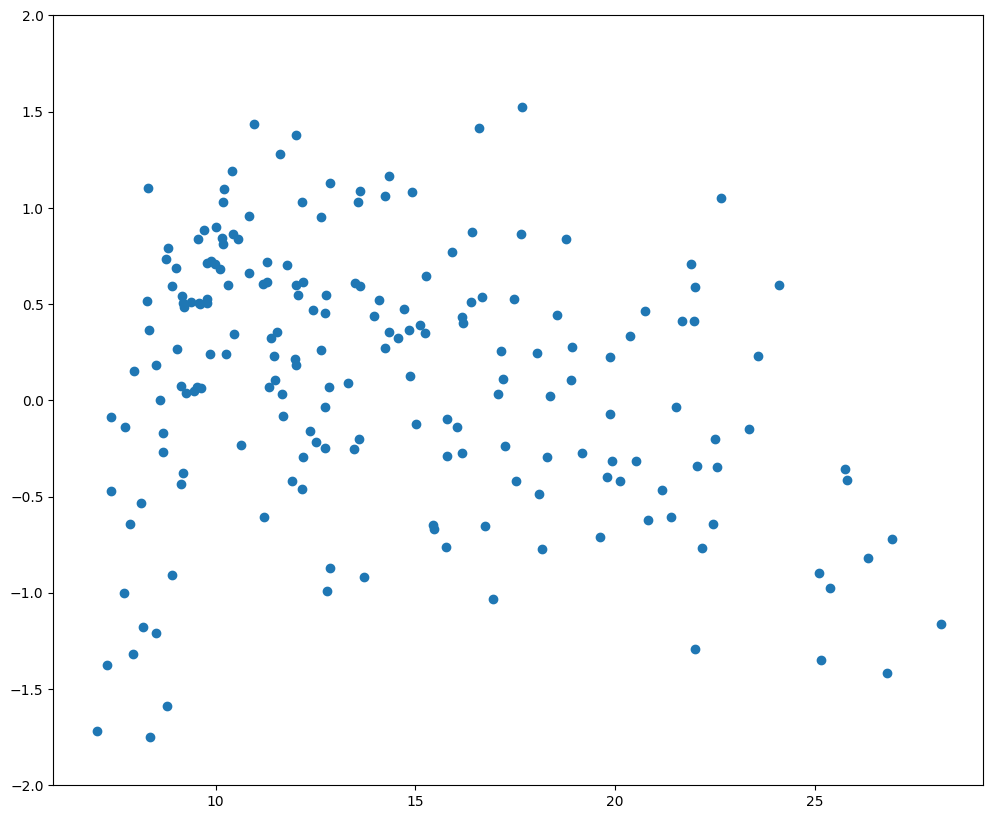

In [ ]:
# Looks like a non-random shape. data appears slightly non-linear though not too bad
# 看起来像一个非随机形状。数据看起来有点非线性，但还不算太糟
plt.figure(figsize=(12,10))
plt.scatter(results.predict(adv), resid)
plt.ylim(-2, 2);

# Lab
In the book, the lab focuses on performing a linear regression on the Boston dataset. We will do so using seaborn, statsmodels and scikit learn

在书中，实验室重点介绍对波士顿数据集进行线性回归。我们将使用 seaborn、statsmodels 和 scikit learn 进行此操作

In [ ]:
boston = pd.read_csv('/content/boston.csv')
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


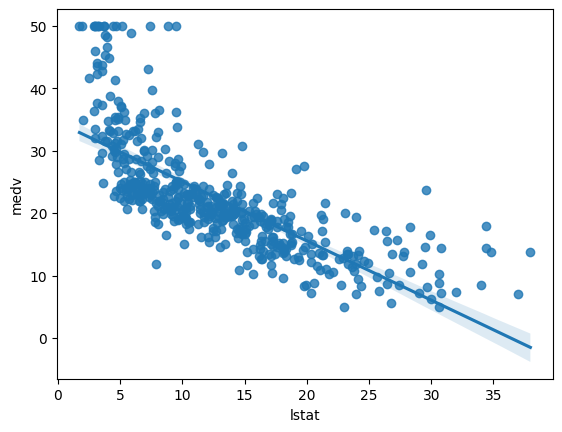

In [ ]:
sns.regplot(x='lstat', y='medv', data=boston);

In [ ]:
# statsmodels 统计模型
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 06 May 2024   Prob (F-statistic):           5.08e-88
Time:                        04:39:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

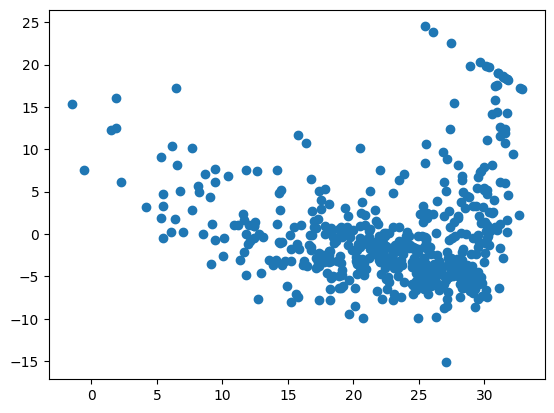

In [ ]:
# look at residuals
# Yikes. lots of nonlinearity. Need a different model 太多非线性了。需要不同的模型
plt.scatter(results.fittedvalues, results.resid);

In [ ]:
# Get all columns. No easy way to do this like in R 获取所有列。没有像在 R 中那样简单的方法可以做到这一点
# Mostly highly significant variables 大部分变量都非常重要
string_cols = ' + '.join(boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 06 May 2024   Prob (F-statistic):          6.72e-135
Time:                        04:39:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# remove age
string_cols = ' + '.join(boston.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 06 May 2024   Prob (F-statistic):          6.08e-136
Time:                        04:40:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Interaction 相互作用
results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 06 May 2024   Prob (F-statistic):           4.86e-88
Time:                        04:41:08   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Interaction
results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 06 May 2024   Prob (F-statistic):          1.56e-112
Time:                        04:41:11   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.stats.anova import anova_lm

In [ ]:
results1 = smf.ols('medv ~ lstat', data=boston).fit()
results2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

anova_lm(results1, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


In [ ]:
anova_lm?

In [ ]:
# Manually compute F 手动计算 F
(results1.ssr - results2.ssr) / (results2.ssr / results2.df_resid)

135.19982210087164

In [ ]:
anova_lm(results1)

,df,sum_sq,mean_sq,F,PR(>F)
lstat,1.0,23243.913997,23243.913997,601.617871,5.081103e-88
Residual,504.0,19472.381418,38.635677,NaN,NaN


In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 06 May 2024   Prob (F-statistic):           5.08e-88
Time:                        04:41:22   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
carseats = pd.read_csv('/content/carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
results = smf.ols('Sales ~ ShelveLoc + Price + Urban', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     118.2
Date:                Mon, 06 May 2024   Prob (F-statistic):           3.38e-66
Time:                        04:41:49   Log-Likelihood:                -824.94
No. Observations:                 400   AIC:                             1660.
Df Residuals:                     395   BIC:                             1680.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.8082      0.522     22.633      0.000      10.782      12.834
ShelveLoc[T.Good]       4.9263      0.286     17.200      0.000       4.363       5.489
ShelveLoc[T.Medium]     1.8863      0.235      8.023      0.000       1.424       2.349
Urban[T.Yes]            0.2937      0.211      1.392      0.165      -0.121       0.708
Price                  -0.0570      0.004    -14.036      0.000      -0.065      -0.049
==============================================================================
Omnibus:                        2.355   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                2.009
Skew:                           0.054   Prob(JB):                        0.366
Kurtosis:                       2.670   Cond. No.                         665.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exercises

# 1
There are 3 different null hypotheses for each of TV, Radio and Newspaper each testing whether there is a relationship from that variable to Sales given that the other two variables are held constant. From this model we can reject the null hypotheses that both TV and Radio have no correspondence with sales. We fail to reject the null hypotheses that Newspaper advertising is related to Sales.


电视、广播和报纸各有 3 个不同的零假设，每个假设都检验在其他两个变量保持不变的情况下该变量与销售量之间是否存在关系。从这个模型中，我们可以拒绝电视和广播与销售量没有对应关系的零假设。我们无法拒绝报纸广告与销售量相关的零假设。

# 2
KNN classification predicts as the category who has the highest frequency among it's k nearest neighbors. KNN regression predicts the mean of its nearest K neighbors.

KNN 分类预测其 k 个最近邻居中频率最高的类别。KNN 回归预测其最近 K 个邻居的平均值。

# 3
a) iii is correct. Males will earn more than females GPA is high enough. Higher than 3.5 to be exact to wipe away the female advantage.  
b) 50 + (20 * 4) + (.07 * 110) + (35 * 1) + (.01 * 110 * 4)  - (10 * 1 * 4) = 137.1  
c) False, it all comes down to the standard error of the coefficient to determine significance. It could very well be the most significant factor.


a) iii 是正确的。只要 GPA 足够高，男性的收入就会高于女性。确切地说，高于 3.5 才能消除女性的优势。
b) 50 + (20 * 4) + (.07 * 110) + (35 * 1) + (.01 * 110 * 4) - (10 * 1 * 4) = 137.1
c) 错误，这一切都归结为确定重要性的系数的标准误差。它很可能是最重要的因素。

# 4
a) For training data, the RSS always decreases as model complexity increases so the cubic model will have lower RSS.  
b) For test data, the RSS for the linear model should do better as the cubic model will have fit noise and the true model is linear.  
c) Cubic model. Same answer as a)  
d) This would be impossible to know. It could go both ways as the true model is not known. Must compute RSS on test data in this case


+ a) 对于训练数据，RSS 总是随着模型复杂度的增加而减小，因此三次模型的 RSS 会更低

+ b) 对于测试数据，线性模型的 RSS 应该会更好，因为三次模型会有拟合噪声，而真实模型是线性的

+ c) 三次模型。答案与 a) 相同

+ d) 这不可能知道。由于不知道真实模型，因此可能两种情况都存在。在这种情况下，必须根据测试数据计算 RSS

# 5
Combining the first equation $\hat{y_i} = x_i\hat{\beta}$ with (3.38) we get $$\hat{y_i} = \frac{x_i\sum\limits_{k=1}^n x_k y_k}{\sum\limits_{j=1}^nx_j^2}$$

The $x_i$ outside of the summation is a constant and be distributed inside the summation. $$\hat{y_i} = \sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})y_k$$

$a_i$ is everything between the parentheses. $$a_i = \frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2}$$


将第一个方程 $\hat{y_i} = x_i\hat{\beta}$ 与 (3.38) 相结合，我们得到 $$\hat{y_i} = \frac{x_i\sum\limits_{k=1}^n x_k y_k}{\sum\limits_{j=1}^nx_j^2}$$

求和之外的 $x_i$ 是一个常数，并且在求和内是分布的。 $$\hat{y_i} = \sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})y_k$$

$a_i$ 是括号内的所有内容。 $$a_i = \frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2}$$

# 6
Just rearrange the second equation in 3.4 and you have the equality

只需重新排列 3.4 中的第二个等式，即可得到等式
# 7
See image below  参见下图

In [ ]:
from IPython.display import Image

In [ ]:
Image('images/Chapter 3 - 7 proof.jpg')

# 8

In [ ]:
auto = pd.read_csv('data/auto.csv')
auto.head()

In [ ]:
results = smf.ols('mpg ~ horsepower', data=auto).fit()
results.summary()

i) Yes there is strong evidence of a relationship between mpg and horsepower  
ii) Just from the summary it is very strong as the t-statistic is -24 though there is still lots of variation left in the model with an r-squared of .6  
iii) negative  

i. 是的，有强有力的证据表明英里/加仑和马力之间存在关系

ii. 仅从摘要来看，它非常强，因为 t 统计量为 -24，尽管模型中仍存在大量变化，r 平方为 .6

iii. 负


In [ ]:
results.conf_int()

In [ ]:
results.params['Intercept'] + results.params['horsepower'] * 98

In [ ]:
results.conf_int()

In [ ]:
results.bse

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats

In [ ]:
st, data, ss2 = summary_table(results, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# wls cinv
prstd, iv_l, iv_u = wls_prediction_std(results)

# plot OLS
cil, = plt.plot(auto['horsepower'], predict_ci_low, 'r--', lw=1, alpha=0.5)
ciu, = plt.plot(auto['horsepower'], predict_ci_upp, 'r--', lw=1, alpha=0.5)
mcil, = plt.plot(auto['horsepower'], predict_mean_ci_low, 'b--', lw=1, alpha=0.5)
mciu, = plt.plot(auto['horsepower'], predict_mean_ci_upp, 'b--', lw=1, alpha=0.5)


plt.scatter(auto['horsepower'], auto['mpg']);

In [ ]:
# create function to compute confidence or prediction interval given an x value
# 创建函数来计算给定 x 值的置信度或预测区间
def create_interval(ols_result, interval_type, alpha, x_values, conf_x):
    if interval_type == 'confidence':
        add_one = 0
    elif interval_type == 'prediction':
        add_one = 1
    else:
        print("Choose interval_type as confidence or prediction")
        return
    n = len(x_values)
    t_value = stats.t.ppf(1 - alpha / 2, df = n - 2)
    sy = np.sqrt((ols_result.resid ** 2).sum() / (n - 2))
    numerator = (conf_x - x_values.mean()) ** 2
    denominator = ((x_values - x_values.mean()) ** 2).sum()
    interval = t_value * sy * np.sqrt(add_one + 1 / n + numerator / denominator)
    prediction = results.params[0] + results.params[1] * conf_x
    return (prediction - interval, prediction + interval)

In [ ]:
create_interval(results, 'confidence', .05, auto['horsepower'], 98)

In [ ]:
create_interval(results, 'prediction', .05, auto['horsepower'], 98)

In [ ]:
# Severe problems with the data 数据存在严重问题
plt.scatter(results.fittedvalues, results.resid);

In [ ]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# 9

In [ ]:
sns.pairplot(auto)

In [ ]:
auto.corr()

In [ ]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
formula

In [ ]:
results = smf.ols(formula, data=auto).fit()
results.summary()

i) There is a clear relationship between predictor and response. F-stat is very high.  
ii) displacement, weight, year, origin are statistically significant    
iii) Its positive, so the higher the year the more the mpg   

i) 预测因子和响应之间存在明确的关系。 F-stat 非常高。
ii) 排量、重量、年份、产地具有统计显著性
iii) 其为正值，因此年份越高，英里/加仑越多

### d) look at diagnostic plots

In [ ]:
results_influence = OLSInfluence(results)

In [ ]:
import statsmodels.api as sm

# looks very similar to previous problem 看起来与之前的问题非常相似
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].scatter(results.fittedvalues, results.resid)
ax[0, 0].set_ylabel("Raw Residuals")
ax[1, 0].scatter(results.fittedvalues, results_influence.resid_studentized_external)
ax[1, 0].set_ylabel("Studentized Residual")
sm.graphics.qqplot(results.resid / np.sqrt((results.resid ** 2).sum() / 390), line='45', ax=ax[0, 1])
ax[1, 1].scatter(results_influence.resid_studentized_external ** 2, results_influence.influence);

Most residuals fall within 3 standard deviations and the qqplot looks relatively good until the right tail where a few observations are above 3 standard deviations indicating outliers.

In [ ]:
# point 13 has unusually large leverage 点 13 的杠杆率异常高
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

### e) Add interaction effects  添加交互效果

In [ ]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])

In [ ]:
from itertools import combinations

In [ ]:
interactions_formula =  " + ".join([comb[0] + " * " + comb[1] for comb in combinations(auto.columns[1:-1], 2)])
interactions_formula

In [ ]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
formula += ' + ' + interactions_formula

In [ ]:
results = smf.ols(formula, data=auto).fit()
results.summary()

After adding all possible (7c2 = 21) interaction combination effects to the model only one of them is significant at the .01 level. Acceleration * origin

将所有可能的（7c2 = 21）交互组合效应添加到模型后，只有其中一个在 .01 水平上显著。加速度 * 原点

In [ ]:
# add displacement squared to model  将位移平方添加到模型中

In [ ]:
formula += ' + np.power(displacement, 2)'
results = smf.ols(formula, data=auto).fit()
results.summary()

In [ ]:
# lots of multicolinearity going on here  这里存在许多多重共线性
results = smf.ols('mpg ~ displacement + origin + np.power(displacement, 2)', data=auto).fit()
results.summary()

In [ ]:
# sqrt of horsepower has higher r-squared than horsepower by itself
# 马力的平方比马力本身的 r 平方更高
results = smf.ols('mpg ~ np.sqrt(horsepower)', data=auto).fit()
results.summary()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(auto['horsepower'], auto['mpg'])
ax1.set_title("Horsepower vs MPG")
ax2.scatter(np.log(np.log(auto['horsepower'])), auto['mpg'])
ax2.set_title("Log(Log(Horsepower)) vs MPG");

In [ ]:
# R-squared increases a bit more with log-log-horsepower
# R 平方随马力对数增加而略有增加
results = smf.ols('mpg ~ np.log(np.log((horsepower)))', data=auto).fit()
results.summary()

# 10 - Carseats data 汽车座椅数据

In [ ]:
carseats = pd.read_csv('data/carseats.csv')
carseats.head()

In [ ]:
results = smf.ols('Sales ~ Price + Urban + US', data=carseats).fit()
results.summary()

Only US and Price are statistically significant in our model. There is no difference whether someone is living in an urban area or not. Living in the US adds 1.2 to Sales up from 13 for outside of US. For every 1 unit increase in Price a corresponding .05 decrease in sales is seen.

在我们的模型中，只有美国和价格具有统计意义。无论某人是否居住在城市地区，都没有区别。居住在美国会使销售额增加 1.2，而居住在美国以外的销售额增加 13。价格每增加 1 个单位，销售额就会相应减少 0.05。

# equations 方程式
Ignoring Urban because its not significant. 忽略 Urban，因为它并不重要。
* In US: $Sales = 14.24 - .055 * Price$
* Not in US: $Sales = 13.04 - .055 * Price$

d) Reject null for US and Price 拒绝美国和价格的零值

In [ ]:
# e) smaller model without urban 没有城市规模的较小模型
results = smf.ols('Sales ~ Price + US', data=carseats).fit()
results.summary()

f) Since urban is nearly completely random, there is almost no difference in the two models above. R-squared is low so lots of variance remains in the model  
g) See table

f) 由于城市几乎完全随机，上述两个模型几乎没有区别。R 平方很低，因此模型中仍存在大量方差

g) 见表格

In [ ]:
# Doesn't appear to be outliers 似乎不是异常值
plt.scatter(results.fittedvalues, results.resid);

In [ ]:
# a few high leverage points above .025 .025 以上的几个高杠杆点
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# 11

In [ ]:
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

In [ ]:
plt.scatter(x, y);

In [ ]:
# No constant. Highly signifcant predictor 没有常数。高度显著的预测因子
results = sm.OLS(y, x).fit()
results.summary()

In [ ]:
# x onto y. Same as above  x 到 y。同上
results = sm.OLS(x, y).fit()
results.summary()

e) The derived equation is symmetric to x and y, meaning you can replace x and y and the equation would be the exact same.

In [ ]:
results = sm.OLS(x, sm.add_constant(y)).fit()
results.summary()

In [ ]:
# F-statistic and t-stat is same with an intercept F 统计量和 t 统计量与截距相同
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

# 12
a) Using equation 3.38, the coefficients will be the same when $\sum{y^2} = \sum{x^2}$  
b) Its very difficult to get the exact same coefficients. Any random pairing will do

a) 使用公式 3.38，当 $\sum{y^2} = \sum{x^2}$ 时，系数将相同

b) 很难得到完全相同的系数。任何随机配对都可以

In [ ]:
# b
np.random.seed(1)
x = np.random.randn(100)
y = x + np.random.randn(100) / 100

In [ ]:
# very close to a perfect line 非常接近完美的线条
plt.scatter(x, y)

In [ ]:
np.corrcoef(x, y)

In [ ]:
results = sm.OLS(y, x).fit()
results.summary()

In [ ]:
# coefficients are just a little different 系数略有不同
results = sm.OLS(x, y).fit()
results.summary()

In [ ]:
# c) if x and y are the exact same (but in a different order) the coefficients for the model should be the same
# 如果 x 和 y 完全相同（但顺序不同），则模型的系数应该相同
x = np.random.randn(100) * 5
y = x.copy()
np.random.shuffle(y)

In [ ]:
# perf
plt.scatter(x, y);

In [ ]:
results = sm.OLS(x, y).fit()
results.summary()

In [ ]:
# Same coefficient!  同系数
results = sm.OLS(y, x).fit()
results.summary()

# 13

In [ ]:
x = np.random.randn(100)
eps = np.random.randn(100) * .25
y = -1 + .5 * x + eps # b0 = -1 and b1 = .5

In [ ]:
plt.scatter(x, y);

In [ ]:
# coefficient estimates are very close to actual  系数估计值非常接近实际
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

In [ ]:
# they are very close to one another  它们彼此非常接近
plt.scatter(x, y)
plt.plot(x, -1 + .5 * x, label ='pop')
plt.plot(x, results.params[0] + results.params[1] * x, label = 'fit')
plt.legend();

In [ ]:
results.params

In [ ]:
# x squared is not significant x 平方不显著
x2 = np.column_stack((np.ones(100), x, x ** 2))
results = sm.OLS(y, x2).fit()
results.summary()

In [ ]:
# the confidence intervals will shrink/expand with eps 置信区间将随着 eps 缩小/扩大

# 14

In [ ]:
np.random.seed(1)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)
# regresion coeffs are 2, 2, .3  回归系数为 2、2、.3

In [ ]:
# very highly correlated. Only differ by random factor between 0 and .1
# 相关性非常高。仅因 0 到 0.1 之间的随机因素而不同
np.corrcoef(x1, x2)

In [ ]:
plt.scatter(x1, x2);

In [ ]:
# Surprisingly both variables are not significant 令人惊讶的是，这两个变量都不显著
X = np.column_stack((np.ones(100), x1, x2))
results = sm.OLS(y, X).fit()
results.summary()

In [ ]:
X = np.column_stack((np.ones(100), x1))
results = sm.OLS(y, X).fit()
results.summary()

In [ ]:
X = np.column_stack((np.ones(100), x2))
results = sm.OLS(y, X).fit()
results.summary()

Since x1 and x2 are very highly correlated to one another it makes sense that when substituted in a linear model for one another a very similar r-squared would be achieved. The high collinearity is causing havoc with the model when both x1 and x2 are in the model. We know beforehand that each variable has a positive relationship with y and in the first model, x1 is positive and x2 is negative which is an impossibility. The standard errors for each predictor grow because of the collinearity which causes them not to be significant when they are.


由于 x1 和 x2 彼此高度相关，因此在线性模型中将它们相互替代时，可以得到非常相似的 r 平方，这是有道理的。当 x1 和 x2 同时存在于模型中时，高共线性会对模型造成严重破坏。我们事先知道每个变量与 y 呈正相关，在第一个模型中，x1 为正，x2 为负，这是不可能的。每个预测变量的标准误差都会因共线性而增大，这导致它们本来就很显著，但实际却不显著。

In [ ]:
x1_new = np.append(x1, .1)
x2_new = np.append(x2, .8)
y_new = np.append(y, 6)

In [ ]:
X = np.column_stack((y_new, x1_new, x2_new))
df_new = pd.DataFrame(X, columns=['y', 'x1', 'x2'])
results = smf.ols('y ~ x2', data=df_new).fit()
results.summary()

In [ ]:
# correlation goes way down with one point 相关性随一点下降
np.corrcoef(x1_new, x2_new)

In [ ]:
# huge outlier here 这里存在巨大的异常值
plt.scatter(x1_new, x2_new)

In [ ]:
# Not an outlier in terms of residual, but very likely very influential
# 从残差角度看，这不是异常值，但很可能影响很大
plt.scatter(results.fittedvalues, results.resid);

In [ ]:
# Yup its unbelievably influential 是的，它的影响力令人难以置信
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# 15

In [ ]:
# a) simple linear regression for each predictor 每个预测变量的简单线性回归
boston = pd.read_csv('data/boston.csv')
boston.head()

In [ ]:
# The below prints the confindence interval for each predictor in a simple linear regression
# Nearly all the predictors have 95% confindence bands that don't include 0 meaning they rejecy the null hypothesis
# the only predictors that fails to reject null: chas
# 下面打印了简单线性回归中每个预测因子的置信区间
# 几乎所有预测因子都有 95% 的置信区间，其中不包括 0，这意味着它们拒绝了零假设
# 唯一无法拒绝零假设的预测因子：chas
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    print(results.conf_int())

In [ ]:
formula = 'crim ~ ' + ' + '.join(boston.columns[1:])
formula

In [ ]:
# All variables in model. Many are not significant now 模型中的所有变量。许多变量现在都不重要
results = smf.ols(formula, data=boston).fit()
results.summary()

In [ ]:
# all significant predictors 所有重要预测因素
results.tvalues[abs(results.tvalues) > 2]

In [ ]:
# Get all coefficients from multiple reression model 获取多元回归模型的所有系数
multiple_linear_params = results.params.iloc[1:]

simple_linear_params = pd.Series()
for col in boston.columns[1:]:
    results_slr = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    simple_linear_params = simple_linear_params.append(results_slr.params.loc[[col]])

both_models = pd.DataFrame({'simple': simple_linear_params, 'multiple':multiple_linear_params})
both_models

In [ ]:
both_models.plot.scatter('simple', 'multiple')

In [ ]:
# there are several variables raised to the power of 2 or 3 that are showing significance
# but these need to be combined with other variables to assess their actual importance
# 有几个变量的 2 次方或 3 次方显示出显著性
# 但这些变量需要与其他变量相结合才能评估其实际重要性
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {} + np.power({}, 2) + np.power({}, 3)'.format(col, col, col), data=boston).fit()
    print(results.conf_int())